# Creditcard Fraud Detection

### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, they cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Data
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Summary
Of the 31 columns in the dataset, 29 were pre-scaled, so the remaining two columns were first scaled to make the distrubutions look like other features. The stratify method was used when dividing the data into test and train, because all fraud positive rows could be collected on one side because the data was imbalanced. Since the data was imbalanced, the oversampling method SMOTE (Synthetic Minority Oversampling Technique) was used. Base models were created with the selected algorithms. Hypertuning and ensemble techniques were applied by choosing among the base models. Since precision, recall and f1 are important metrics in Fraud detection, the priority was to keep them high.

Overview
1) Understand the shape of the data
2) Data Exploration
3) Data Preprocessing for Model
4) Basic Model Building
5) Model Tuning
6) Ensemble Model Building

### 1) Understand the shape of the data

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
df=pd.read_csv("creditcard.csv")

In [35]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [36]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [37]:
pd.set_option('display.max_columns', 500)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [39]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 2) Data Exploration

Text(0.5, 1.0, 'df')

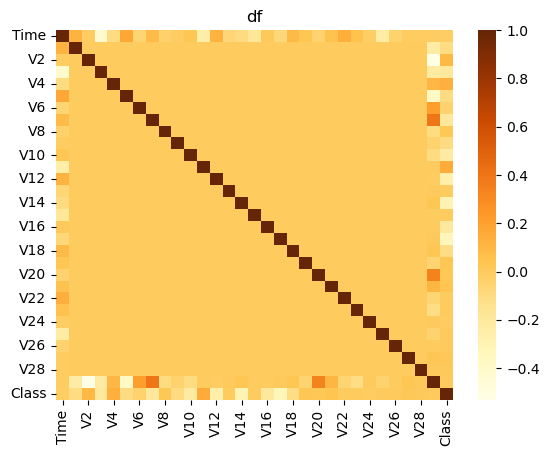

In [40]:
cmap = sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(df.corr(), cmap = cmap)
plt.title("df")

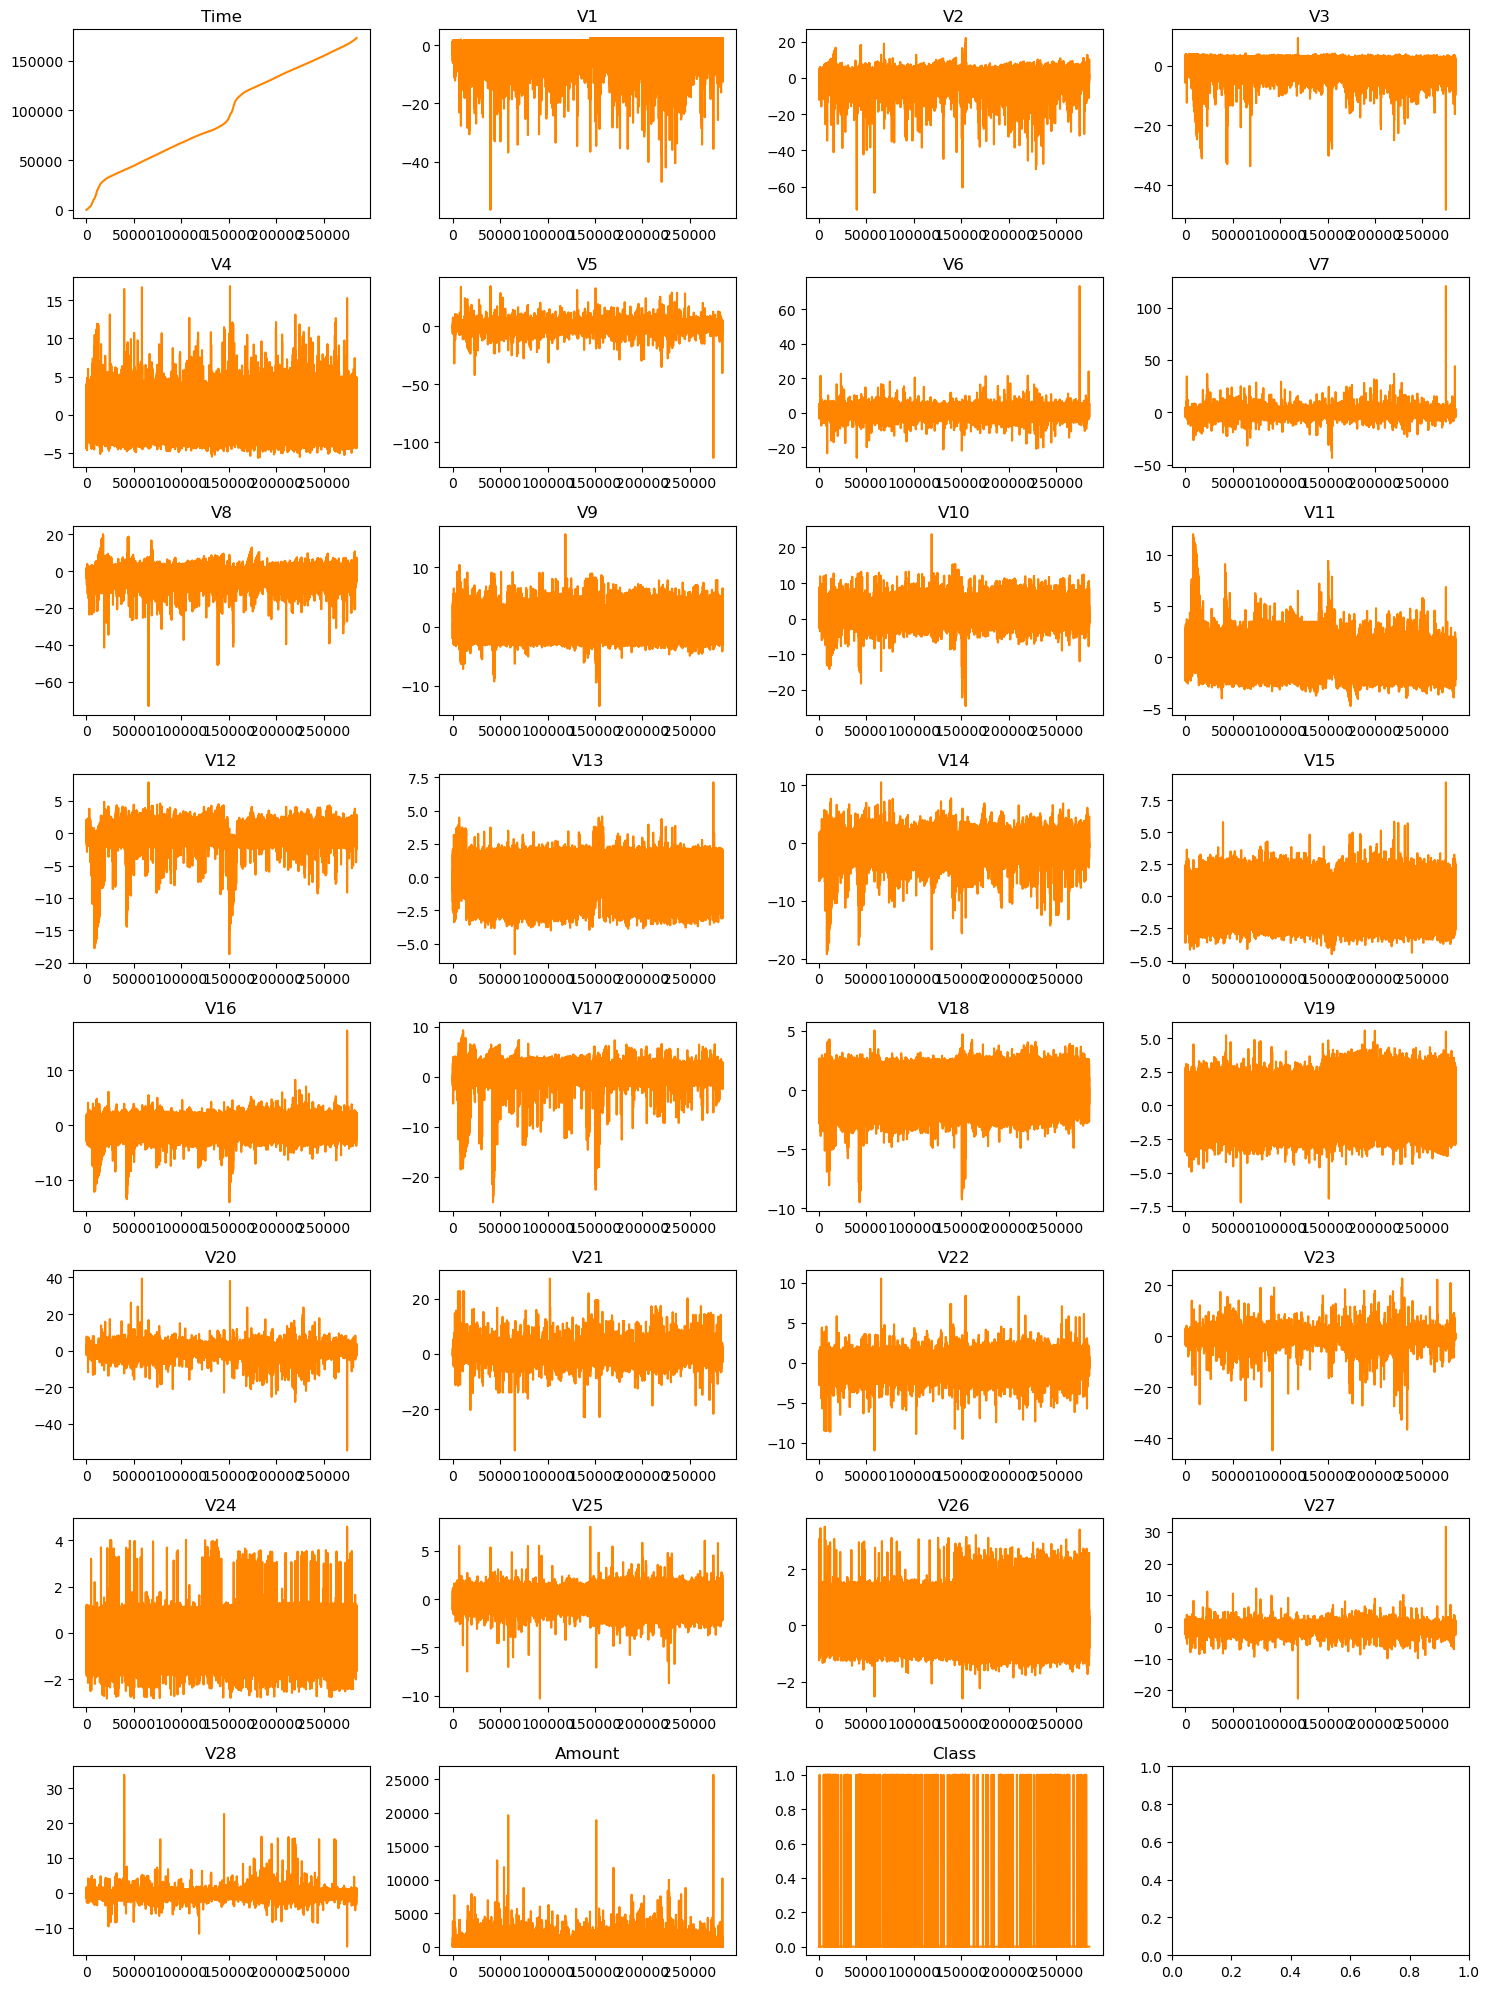

In [41]:
fig, axs = plt.subplots(ncols=4, nrows=8, figsize=(15, 20))

for i, col in enumerate(df.columns):
    row_idx = i // 4
    col_idx = i % 4
    axs[row_idx, col_idx].plot(df[col], color = "#FF8400")
    axs[row_idx, col_idx].set_title(col)

fig.tight_layout()
plt.show()

(0.0, 172792.0)

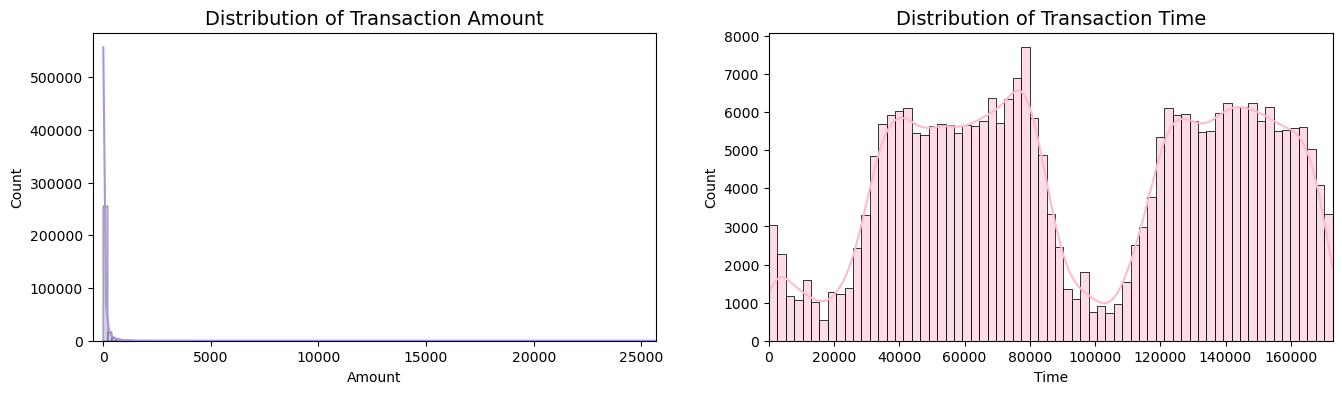

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))

amount_val = df.Amount
time_val = df.Time

sns.histplot(df.Amount, ax=ax[0], color='#AA96DA', kde=True, binwidth = 200)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(df.Amount)-500, max(df.Amount)])

sns.histplot(df.Time, ax=ax[1], color='#FCBAD3', kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(df.Time), max(df.Time)])

### 3) Data Preprocessing for Model

In [43]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df.Amount.values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df.Time.values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [44]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [45]:
print('The percentage of no frauds : ', round(df.Class.value_counts()[0]/len(df) * 100, 2), "%")
print('The percentage of frauds : ', round(df.Class.value_counts()[1]/len(df) * 100, 2), "%")

The percentage of no frauds :  99.83 %
The percentage of frauds :  0.17 %


In [46]:
X = df.drop('Class', axis=1)
y = df['Class']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [48]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2, sampling_strategy = 0.5)
X_over, y_over = sm.fit_resample(X_train, y_train)

In [49]:
y_over.shape

(319854,)

### 4) Basic Model Building

1. Logistic Regression
2. XGBoost
3. KNeighborsClassifier
4. Random Forest

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

#### 4.1) Logistic Regression

In [51]:
logreg = LogisticRegression(max_iter = 1000)
rf_clf = RandomForestClassifier()
xgb_clf = xgb.XGBClassifier()
knn = KNeighborsClassifier()

In [52]:
logreg.fit(X_over, y_over)
y_pred = logreg.predict(X_test)
logc = metrics.classification_report(y_test, y_pred)
print(logc)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.13      0.90      0.22       123

    accuracy                           0.99     71202
   macro avg       0.56      0.95      0.61     71202
weighted avg       1.00      0.99      0.99     71202



Text(0.5, 1.0, 'Precision Recall Curve')

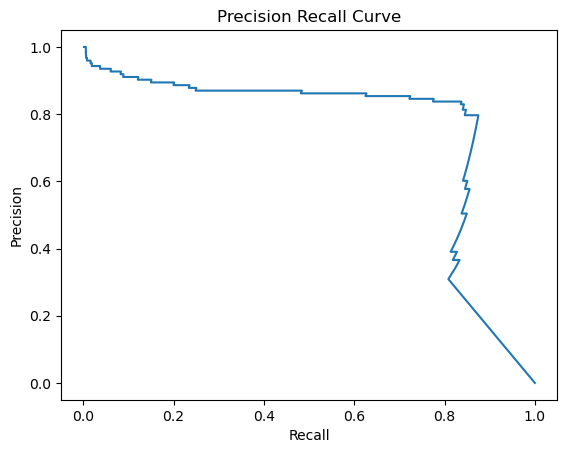

In [53]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

#### 4.2) XGBoost Regression

In [54]:
xgb_clf.fit(X_over, y_over)
y_pred = xgb_clf.predict(X_test)
xgbc = metrics.classification_report(y_test, y_pred)
print(xgbc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.80      0.82      0.81       123

    accuracy                           1.00     71202
   macro avg       0.90      0.91      0.91     71202
weighted avg       1.00      1.00      1.00     71202



Text(0.5, 1.0, 'Precision Recall Curve')

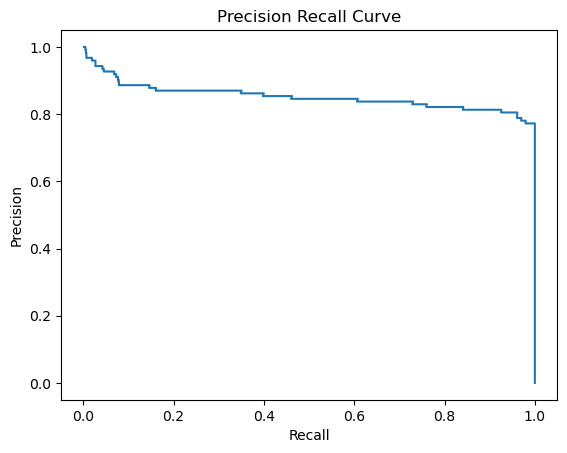

In [55]:
y_pred_prob = xgb_clf.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

#### 4.3) K-Nearest Neighbours classifcation

In [56]:
knn.fit(X_over, y_over)
y_pred = knn.predict(X_test)
knnc = metrics.classification_report(y_test, y_pred)
print(knnc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.43      0.85      0.57       123

    accuracy                           1.00     71202
   macro avg       0.71      0.93      0.78     71202
weighted avg       1.00      1.00      1.00     71202



Text(0.5, 1.0, 'Precision Recall Curve')

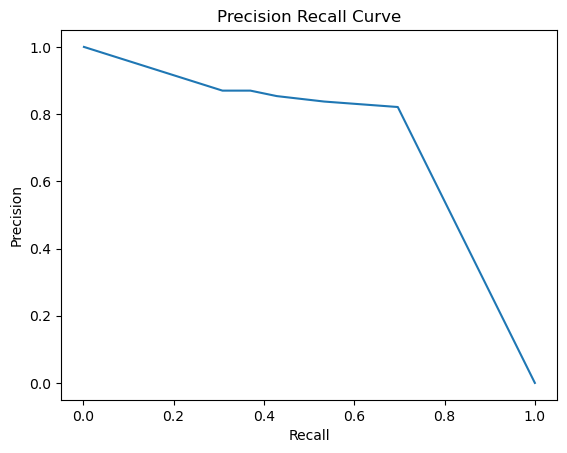

In [57]:
y_pred_prob = knn.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

#### 4.4) Random Forest

In [58]:
rf_clf.fit(X_over, y_over)
y_pred = rf_clf.predict(X_test)
rfc = metrics.classification_report(y_test, y_pred)
print(rfc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.88      0.82      0.85       123

    accuracy                           1.00     71202
   macro avg       0.94      0.91      0.92     71202
weighted avg       1.00      1.00      1.00     71202



Text(0.5, 1.0, 'Precision Recall Curve')

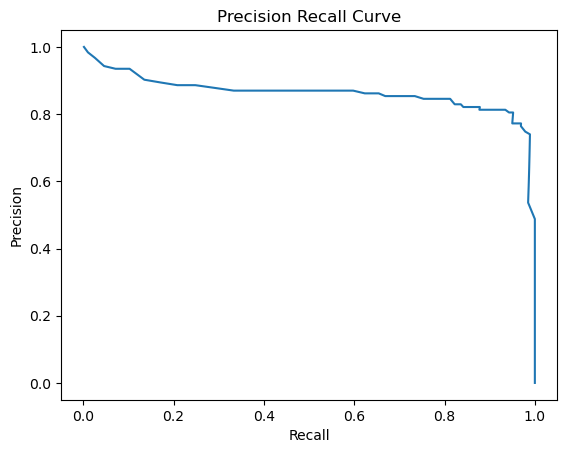

In [59]:
y_pred_prob = rf_clf.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

Feature importances

In [60]:
importances = rf_clf.feature_importances_
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
# Print feature importances with column names as index
for i, row in importances_df.iterrows():
    print("%s: %.3f" % (row['Feature'], row['Importance']))

V14: 0.164
V10: 0.114
V17: 0.110
V12: 0.098
V4: 0.097
V11: 0.060
V16: 0.056
V3: 0.042
V7: 0.039
V9: 0.030
V2: 0.023
V27: 0.022
V6: 0.014
V8: 0.014
V21: 0.013
V18: 0.012
scaled_amount: 0.010
V1: 0.009
V20: 0.008
V5: 0.008
V19: 0.008
V28: 0.008
V13: 0.007
V26: 0.007
scaled_time: 0.006
V15: 0.005
V25: 0.005
V23: 0.004
V22: 0.004
V24: 0.003


### 5) Model Tuning

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
#Logistic Regression
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [100, 250, 500],
    'multi_class': ['ovr', 'multinomial']}

grid_lg = GridSearchCV(logreg, logreg_param_grid, cv = 5, verbose=1, n_jobs = -1)
best_fit_lg = grid_lg.fit(X_over, y_over)
y_pred = best_fit_lg.best_estimator_.predict(X_test)
grid_lg = metrics.classification_report(y_test, y_pred)
print(grid_lg)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.13      0.90      0.22       123

    accuracy                           0.99     71202
   macro avg       0.56      0.95      0.61     71202
weighted avg       1.00      0.99      0.99     71202



In [63]:
# Random Forest Classifier
rf_param_grid = {"criterion": ["gini", "entropy"], 
                 "max_depth": list(range(2,4,1)), 
                 "min_samples_leaf": list(range(5,7,1))}

grid_rf = GridSearchCV(rf_clf, rf_param_grid, cv = 5, verbose=1, n_jobs = -1)
best_fit_rf = grid_rf.fit(X_over, y_over)
y_pred = best_fit_rf.best_estimator_.predict(X_test)
grid_rf = metrics.classification_report(y_test, y_pred)
print(grid_rf)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.59      0.86      0.70       123

    accuracy                           1.00     71202
   macro avg       0.79      0.93      0.85     71202
weighted avg       1.00      1.00      1.00     71202



In [64]:
# XGBoost Classifier
xgb_param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [5, 10],
    'learning_rate': [0.1, 1.0],
    'subsample': [0.5, 0.75, 1.0]}

grid_xgb = GridSearchCV(xgb_clf, xgb_param_grid, cv = 2, verbose=1, n_jobs = -1)
best_fit_xgb = grid_xgb.fit(X_over, y_over)
y_pred = best_fit_xgb.best_estimator_.predict(X_test)
grid_xgb = metrics.classification_report(y_test, y_pred)
print(grid_xgb)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.83      0.81      0.82       123

    accuracy                           1.00     71202
   macro avg       0.92      0.91      0.91     71202
weighted avg       1.00      1.00      1.00     71202



In [66]:
#KNN classification
knn_param_grid = {'n_neighbors': [3, 5],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

grid_knn = GridSearchCV(knn, knn_param_grid, cv = 5, verbose=1, n_jobs = -1)
best_fit_knn = grid_knn.fit(X_over, y_over)
y_pred = best_fit_knn.best_estimator_.predict(X_test)
grid_knn = metrics.classification_report(y_test, y_pred)
print(grid_knn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.54      0.84      0.66       123

    accuracy                           1.00     71202
   macro avg       0.77      0.92      0.83     71202
weighted avg       1.00      1.00      1.00     71202



### 6) Ensemble Model Building

In [53]:
vot_soft = VotingClassifier(estimators = [("Random Forest Classifier", best_fit_rf.best_estimator_), 
                                          ("XGBoost Classifier", best_fit_xgb.best_estimator_)], 
                            voting ='soft')

vot_soft.fit(X_over, y_over)
y_pred = vot_soft.predict(X_test)
  
score = metrics.classification_report(y_test, y_pred)
print(score)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.92      0.85      0.89       123

    accuracy                           1.00     71202
   macro avg       0.96      0.93      0.94     71202
weighted avg       1.00      1.00      1.00     71202



### 7) Conclusion

As a result of this project, I learned that unbalanced data is approached in a very different way and that each classification problem needs different types of metrics.